In [1]:
#Kütüphanelerin yüklenmesi
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Veri setinin yüklenmesi 
from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris.data, iris.target

In [3]:
#Veri setini eğitim ve test setlerine bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# K-En Yakın Komşu (KNN) Modeli
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_scaled, y_train)
knn_predictions = knn_model.predict(X_test_scaled)

In [6]:
# Naive Bayes Modeli
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)
nb_predictions = nb_model.predict(X_test_scaled)

In [7]:
#Model performansının değelendirilmesi (Bunun için bir fonksiyon kullanıyoruz)
def evaluate_model(predictions, y_test, model_name):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.xlabel('Tahmin Edilen')
    plt.ylabel('Gerçek')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # Classification Report
    cr = classification_report(y_test, predictions, target_names=iris.target_names)
    print(f'{model_name} Classification Report:\n{cr}')

    # Accuracy
    accuracy = accuracy_score(y_test, predictions)
    print(f'{model_name} Accuracy: {accuracy:.4f}')


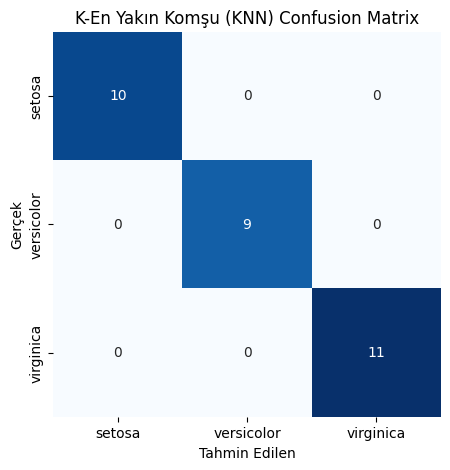

K-En Yakın Komşu (KNN) Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

K-En Yakın Komşu (KNN) Accuracy: 1.0000


In [8]:
# K-En Yakın Komşu (KNN) Modelinin Sonuçları
evaluate_model(knn_predictions, y_test, 'K-En Yakın Komşu (KNN)')

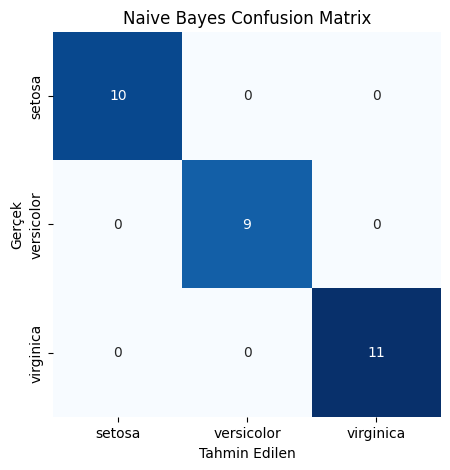

Naive Bayes Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Naive Bayes Accuracy: 1.0000


In [10]:
# Naive Bayes Modelinin Sonuçları
evaluate_model(nb_predictions, y_test, 'Naive Bayes')
